# Bibliotecas, módulos e Pré Processamento

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns

#importação do dataset
df_water = pd.read_csv(r'https://raw.githubusercontent.com/MaiRodrigues/datasets/main/water_potability.csv', sep=',')

#soma de inválidos
df_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [33]:
# correção valores inválidos

invalidos = (df_water.isnull().sum() / len(df_water) * 100)
excluir = invalidos[invalidos > 20].index.tolist()
preencher = invalidos[invalidos <= 20].index.tolist()

df_water = df_water.drop(columns=excluir)

for col in preencher:
    df_water[col].fillna(method='bfill', inplace=True)
    
    
# divisão preditoras e dependente
    
X = df_water.drop(['Potability'], axis=1)
y = df_water['Potability']

# normalização

X = (X - X.min()) / (X.max() - X.min())
X

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.265434,0.571139,0.336096,0.543891,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.368912,0.678284,0.560655,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.387157,0.343638,0.622659,0.616120


# Classificação com Dataset Original

In [34]:
# divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

# aplicando o classificador

random_forest = RandomForestClassifier(n_estimators = 10, random_state=0)
random_forest.fit(X_train, y_train)
y_pred  = random_forest.predict(X_test)

# verificando o report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72       617
           1       0.47      0.29      0.36       366

    accuracy                           0.61       983
   macro avg       0.56      0.55      0.54       983
weighted avg       0.59      0.61      0.59       983



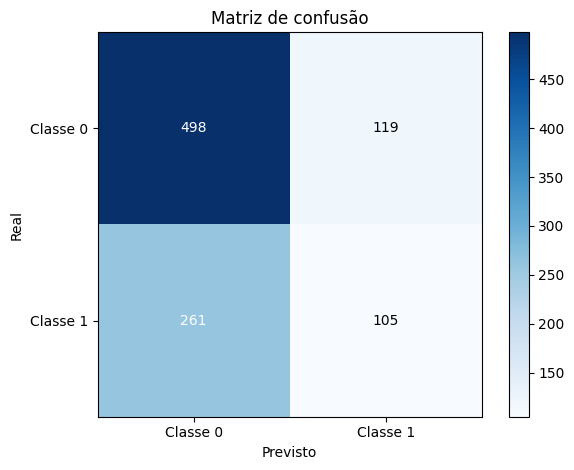

In [5]:
# matriz de confusão

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Classe 0', 'Classe 1'],
       yticklabels=['Classe 0', 'Classe 1'],
       title='Matriz de confusão',
       ylabel='Real',
       xlabel='Previsto')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## Conclusão

A feature 1 aparenta não conter informações discriminativas suficientes para distinguir as classes. É possível notar no Recall e na matriz de confusão que a capacidade do classificador de encontrar todas as amostras positivas na classe 1 foi muito inferior comparado com a classe 0 (29%). Isso reflete diretamente na nossa acurácia nesse primeiro exemplo.

OBS: imaginei que isso poderia ser por conta da diferença nas proporções das classes mas mesmo aplicando a técnica SMOTE o resultado continuou o mesmo.

# Feature Selection

In [35]:
#aplicando o rfe
rfe = RFE(random_forest, n_features_to_select = 3)
X_selected = rfe.fit_transform(X,y)

selected_features = rfe.support_
feature_ranking = rfe.ranking_

print("Features selecionadas:")
for feature, selected in enumerate(selected_features):
    if selected:
        print(f"Feature {feature+1}")

print("\nRanking das features:")
for feature, rank in enumerate(feature_ranking):
    print(f"Feature {feature+1}: {rank}")

# divisão treino e teste
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_selected,y, train_size=0.7, random_state=42)

# aplicando o classificador
random_forest.fit(X_train_rfe, y_train_rfe)
y_pred_rfe  = random_forest.predict(X_test_rfe)

# verificando o report
print(classification_report(y_test_rfe, y_pred_rfe))

Features selecionadas:
Feature 1
Feature 2
Feature 4

Ranking das features:
Feature 1: 1
Feature 2: 1
Feature 3: 2
Feature 4: 1
Feature 5: 4
Feature 6: 3
Feature 7: 5
Feature 8: 6
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       617
           1       0.41      0.28      0.33       366

    accuracy                           0.58       983
   macro avg       0.53      0.52      0.51       983
weighted avg       0.56      0.58      0.56       983



In [37]:
# ajustando o RFE com a quantidade ideal de features

rfe2 = RFE(random_forest, n_features_to_select = 6)
X_selected2 = rfe2.fit_transform(X,y)

X2_train_rfe, X2_test_rfe, y2_train_rfe, y2_test_rfe = train_test_split(X_selected2,y, train_size=0.7, random_state=42)

random_forest_rfe2 = RandomForestClassifier(n_estimators = 10, random_state=0)
random_forest_rfe2.fit(X2_train_rfe, y2_train_rfe)
y_pred_rfe2  = random_forest_rfe2.predict(X2_test_rfe)


print(classification_report(y2_test_rfe, y_pred_rfe2))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       617
           1       0.49      0.30      0.37       366

    accuracy                           0.62       983
   macro avg       0.57      0.56      0.55       983
weighted avg       0.60      0.62      0.60       983



## Conclusão

* O processo de seleção de features em alguns casos se torna desnecessário em termos de melhora no desempenho do algoritmo e quando a quantidade incorreta de features é selecionada, se torna prejudicial.
Utilizando 75% das features, eu obtive praticamente o mesmo resultado do Dataset completo: 62% de acurácia

* Um dos motivos é que o Random Forest pode lidar bem com características não informativas, já que tende a dar menos peso a essas características durante o processo de divisão. (Além do ponto já abordado anteriormente que tudo indica que a qualidade dos dados de entrada da variável 1 representa um problema na distinção das classes)

# Component Principal Analysis (PCA)

In [8]:
pca = PCA(n_components = 3)
P = pca.fit_transform(X)

print("Formato dos dados Originais:", X.shape)
print("Formato dos dados após a seleção de features:", P.shape)

Formato dos dados Originais: (3276, 8)
Formato dos dados após a seleção de features: (3276, 3)


In [9]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(P, y, train_size=0.7, random_state=42)

random_forest.fit(X_pca_train, y_pca_train)
y_pred_pca = random_forest.predict(X_pca_test)

print(classification_report(y_pca_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       617
           1       0.39      0.28      0.33       366

    accuracy                           0.57       983
   macro avg       0.51      0.51      0.50       983
weighted avg       0.54      0.57      0.55       983



In [10]:
cross_entropy = log_loss(y_pca_test, y_pred_pca)
cross_entropy2 = log_loss(y_test, y_pred)


print("Entropia Cruzada PCA:", cross_entropy)
print("Entropia Cruzada Dataset original:", cross_entropy2)

Entropia Cruzada PCA: 15.510137724920199
Entropia Cruzada Dataset original: 13.933457057847932


## Conclusão

* O PCA quando aplicado de maneira incorreta pode reduzir a capacidade preditiva do modelo, então, em muitos casos onde a dimensionalidade dos dados não representa um problema se torna mais benéfico manter as features originais.
 * Selecionando 6 componentes principais eu obtive o mesmo resultado do Dataset original: 61% de acurácia

# Validação Cruzada 

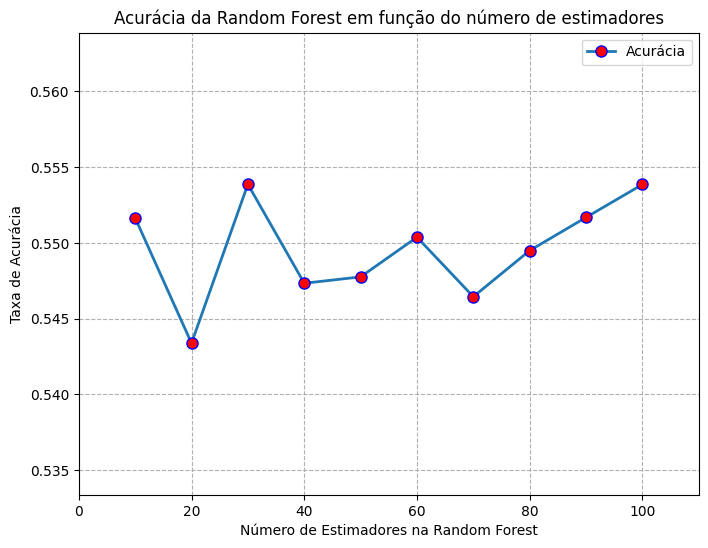

In [11]:
estimators = range(10, 101, 10)

scores = []

for s in estimators:
    random_forest_cv = RandomForestClassifier(n_estimators = s, random_state=0)
    scores_random_forest_cv = cross_val_score(random_forest_cv, X_pca_train, y_pca_train, cv = 10, scoring = 'accuracy' )
    scores.append(scores_random_forest_cv.mean())

plt.figure(figsize=(8, 6))
plt.plot(estimators, scores, linewidth=2.0, marker='o', markersize=8, markeredgecolor='blue', markerfacecolor='red', label='Acurácia')
plt.xlim(0, max(estimators) + 10)
plt.ylim(min(scores) - 0.01, max(scores) + 0.01)
plt.title('Acurácia da Random Forest em função do número de estimadores')
plt.xlabel('Número de Estimadores na Random Forest')
plt.ylabel('Taxa de Acurácia')
plt.grid(linestyle="dashed")
plt.legend()
plt.show()

In [12]:
for i in range(len(scores)):
    print("Árvores:", estimators[i],  " e Acurácia com k-fold:", round(scores[i],2))

Árvores: 10  e Acurácia com k-fold: 0.55
Árvores: 20  e Acurácia com k-fold: 0.54
Árvores: 30  e Acurácia com k-fold: 0.55
Árvores: 40  e Acurácia com k-fold: 0.55
Árvores: 50  e Acurácia com k-fold: 0.55
Árvores: 60  e Acurácia com k-fold: 0.55
Árvores: 70  e Acurácia com k-fold: 0.55
Árvores: 80  e Acurácia com k-fold: 0.55
Árvores: 90  e Acurácia com k-fold: 0.55
Árvores: 100  e Acurácia com k-fold: 0.55


## Conclusão

* Aumentar a quantidade de árvores em uma Random Forest nem sempre trará um melhor resultado já que existe um ponto de diminuição dos retornos, após o qual adicionar mais árvores pode não melhorar significativamente o desempenho do modelo. No nosso caso, a partir de 10 árvores já não vale a pena investir custo computacional.